In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, balanced_accuracy_score,f1_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sys import platform

labels={0:'clean',1:'high fry',2:'layered',3:'lowfry',4:'midfry',5:'no_vocals'}
# labels={0:'clean',1:'scream',2:'no vocal'}

In [17]:
n_class = '6class'

X_train=np.load(f'./resources/working_data/{n_class}_x_train-features_only_unnormalized.npy',allow_pickle=True)
X_test=np.load(f'./resources/working_data/{n_class}_x_test-features_only_unnormalized.npy',allow_pickle=True)
X_valid=np.load(f'./resources/working_data/{n_class}_x_valid-features_only_unnormalized.npy',allow_pickle=True)

y_train_hot=np.load(f'./resources/working_data/{n_class}_y_train-features_only_unnormalized.npy',allow_pickle=True)
y_test_hot=np.load(f'./resources/working_data/{n_class}_y_test-features_only_unnormalized.npy',allow_pickle=True)
y_valid_hot=np.load(f'./resources/working_data/{n_class}_y_valid-features_only_unnormalized.npy',allow_pickle=True)

y_train = np.argmax(y_train_hot,axis=1)
y_test = np.argmax(y_test_hot,axis=1)
y_valid = np.argmax(y_valid_hot,axis=1)
#df = pd.DataFrame(d,columns=feature_cols)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [18]:
def classwise_accuracy(cm):
    a=np.zeros(cm.shape)
    for i,x in enumerate(cm):
        a[i]=x/sum(x)
    return a

In [19]:
def eval_metrics(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    macro_acc = balanced_accuracy_score(y_test,y_pred)
    classwise_acc = classwise_accuracy(cm)
    return(cm,acc,f1,macro_acc,classwise_acc)

# kNN

Overall Accuracy Score: 0.33098591549295775
Macro Accuracy: 0.32126335399421174
Class-wise accuracy: 
[[0.46892655 0.18644068 0.02824859 0.05084746 0.25423729 0.01129944]
 [0.14285714 0.23214286 0.10714286 0.26785714 0.17857143 0.07142857]
 [0.24193548 0.27419355 0.12096774 0.16129032 0.18951613 0.01209677]
 [0.23880597 0.25373134 0.08955224 0.11940299 0.28358209 0.01492537]
 [0.13461538 0.29487179 0.14102564 0.15384615 0.25641026 0.01923077]
 [0.09459459 0.10135135 0.02702703 0.02027027 0.02702703 0.72972973]]


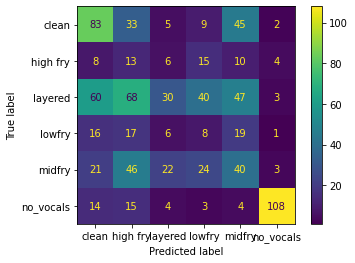

In [20]:
k=4
KNN_model = KNeighborsClassifier(n_neighbors=k)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,KNN_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# SVM

Overall Accuracy Score: 0.3779342723004695
Macro Accuracy: 0.3680334147154978
Class-wise accuracy: 
[[0.68361582 0.14124294 0.         0.03389831 0.1299435  0.01129944]
 [0.21428571 0.32142857 0.01785714 0.17857143 0.16071429 0.10714286]
 [0.18951613 0.37096774 0.03629032 0.15322581 0.22177419 0.02822581]
 [0.34328358 0.25373134 0.01492537 0.01492537 0.37313433 0.        ]
 [0.08333333 0.44230769 0.00641026 0.12820513 0.31410256 0.02564103]
 [0.04054054 0.06756757 0.         0.02702703 0.02702703 0.83783784]]


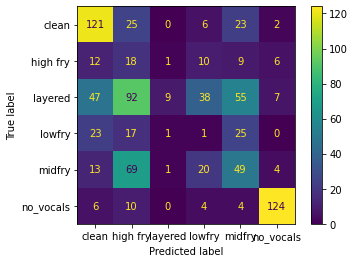

In [21]:
SVM_model = SVC(gamma='scale',C=1.0533, kernel='poly', degree=2,coef0=2.1,random_state=42)
SVM_model.fit(X_train, y_train)

SVM_prediction = SVM_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,SVM_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()

# RF

Overall Accuracy Score: 0.3744131455399061
Macro Accuracy: 0.35825177751838194
Class-wise accuracy: 
[[0.53672316 0.11299435 0.01694915 0.04519774 0.27683616 0.01129944]
 [0.19642857 0.23214286 0.05357143 0.26785714 0.16071429 0.08928571]
 [0.1733871  0.21370968 0.08064516 0.19758065 0.3266129  0.00806452]
 [0.25373134 0.23880597 0.07462687 0.05970149 0.37313433 0.        ]
 [0.05128205 0.29487179 0.08333333 0.12179487 0.42948718 0.01923077]
 [0.04054054 0.08783784 0.         0.02027027 0.04054054 0.81081081]]


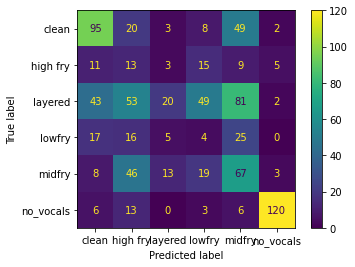

In [22]:
RF_model = RandomForestClassifier(n_estimators=90,criterion='gini',max_depth=None,\
    min_samples_split=2,min_samples_leaf=1,max_features='auto',max_leaf_nodes=None,class_weight='balanced',random_state=42)
RF_model.fit(X_train, y_train)
RF_prediction = RF_model.predict(X_test)

cm,acc,f1,macro_acc,classwise_acc = eval_metrics(y_test,RF_prediction)

print(f"Overall Accuracy Score: {acc}")
print(f"Macro Accuracy: {macro_acc}")
print(f"Class-wise accuracy: \n{classwise_acc}")
l=labels.values()
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=l).plot()